Adapted from https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb

## Introduction

In this tutorial, we will cover:

* IPython: Creating notebooks, Typical workflows
    - Edit mode, commands, ...
* Basic Python
* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* Matplotlib: Plotting, Subplots, Images
* Pandas DataFrames


## IPython
Besides running and organizing code it is possible to:
- easily make lists
- write tex: $\sum_{i=0}^{n-1}i^6$
- display images
- easily format text in *italic*, **bold**, ...



## Python

#### Numbers

Integers and floats work as you would expect from other languages:

In [15]:
x = 3

In [16]:
x

3

In [17]:
x += 1
print(x) 
x *= 2
x

4


8

In [18]:
y = 2.5
type(y)

float

#### Booleans

In [19]:
t, f = True, False

Now we let's look at the operations:

In [20]:
print(t and f) 
print(t or f)  
print(not t)   
print(t != f)  

False
True
False
True


#### Strings

In [21]:
h = 'hello'   # String literals can use single quotes
w = "world"   # or double quotes; it does not matter.
h, len(h)

('hello', 5)

In [22]:
hw = h + ' ' + w  # String concatenation
hw

'hello world'

String objects have a bunch of useful methods; for example:

In [23]:
s = "hello"
print(s.capitalize())  # Capitalize a string; prints "Hello"
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7))     # Center a string, padding with spaces; prints " hello "
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                               # prints "he(ell)(ell)o"
print ('  world '.strip())  # Strip leading and trailing whitespace; prints "world"

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


### Containers

Python includes several built-in container types: lists, dictionaries, sets, and tuples.

#### Lists

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [24]:
xs = [3, 1, 2]   # Create a list
xs, xs[2]

([3, 1, 2], 2)

In [25]:
xs[2] = 'foo'    # Lists can contain elements of different types
xs

[3, 1, 'foo']

In [26]:
xs.append('bar') 
xs.append(22) 
xs.append(1000) 
xs

[3, 1, 'foo', 'bar', 22, 1000]

In [27]:
xs[2:]

['foo', 'bar', 22, 1000]

In [28]:
xs[3:5]

['bar', 22]

#### Exercise
There exist other containers such as Sets, Dictionaries ot Tuples. Define one of each and insert two instances. 

#### Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [29]:
nums = list(range(5))   
print(nums)         
print(nums[2:4])    
print(nums[2:])     
print(nums[:2] )    
print(nums[:] )     
print(nums[:-1])    
nums[2:4] = [8, 9] 
print(nums)         

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


#### Loops

You can loop over the elements of a list like this:

In [30]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [31]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print(idx, animal)

0 cat
1 dog
2 monkey


To iterate a given number of times use the function `range`

In [32]:
for i in range(3):
    print("iteration",i)

iteration 0
iteration 1
iteration 2


#### Exercise
using the `range` function (and not the conditional statement `if`) iterate displaying the even numbers from 2 to 10.

#### List comprehensions:

When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [33]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
squares

[0, 1, 4, 9, 16]

You can make this code simpler using a list comprehension:

In [34]:
nums = list(range(9))
squares = [x ** 2 for x in nums]
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64]

List comprehensions can also contain conditions:

In [35]:
nums = list(range(9))
even_squares = [x ** 2 for x in nums if x % 2 == 0]
even_squares

[0, 4, 16, 36, 64]

#### Exercise
Rewrite these comprehensions as a regular loop

#### Exercise
The are set complehensions and dictioanry comprehensions. Define a dictionary comprehension that maps each word in `['cat', 'dog', 'monkey']` with the number of characters it has.

### Functions

Python functions are defined using the `def` keyword. For example:

In [36]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

negative
zero
positive


We will often define functions to take optional keyword arguments, like this:

In [37]:
def emphasize(name, repes=0):
    print("Hello ",name,'!'*repes, sep='')

emphasize("John")
emphasize("John",9)

Hello John
Hello John!!!!!!!!!


## Numpy

To use Numpy, we first need to import the `numpy` package:

In [38]:
import numpy as np

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [39]:
a = np.array([1, 2, 3])  # Create a rank 1 array
a

array([1, 2, 3])

In [40]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
b

array([[1, 2, 3],
       [4, 5, 6]])

In [41]:
b.shape, b[0, 0], b[0, 1], b[1, 0]

((2, 3), 1, 2, 4)

Numpy also provides many functions to create arrays:

In [42]:
np.zeros((2,2))

array([[ 0.,  0.],
       [ 0.,  0.]])

In [43]:
np.ones((1,2))   

array([[ 1.,  1.]])

In [44]:
np.full((2,2), 7) 

array([[7, 7],
       [7, 7]])

In [45]:
np.eye(2)        

array([[ 1.,  0.],
       [ 0.,  1.]])

In [46]:
np.random.random((2,2)) 

array([[ 0.59275368,  0.88943218],
       [ 0.48388212,  0.273676  ]])

#### Exercise
Give several examples the `reshape` function.

### Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [47]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
b

array([[2, 3],
       [6, 7]])

A slice of an array is a view into the same data, so modifying it will modify the original array.

In [48]:
b[0, 0] = 77    
a

array([[ 1, 77,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [49]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  

bool_idx

array([[False, False],
       [ True,  True],
       [ True,  True]], dtype=bool)

In [50]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
a[bool_idx]


array([3, 4, 5, 6])

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [51]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
x + y

array([[  6.,   8.],
       [ 10.,  12.]])

In [52]:
x * y

array([[  5.,  12.],
       [ 21.,  32.]])

Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [53]:
print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10.0
[ 4.  6.]
[ 3.  7.]


Most of these functions can be called in these two ways

In [54]:
x.mean(axis=0), np.mean(x,axis=0)

(array([ 2.,  3.]), array([ 2.,  3.]))

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [55]:
x.T

array([[ 1.,  3.],
       [ 2.,  4.]])

Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [56]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [57]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

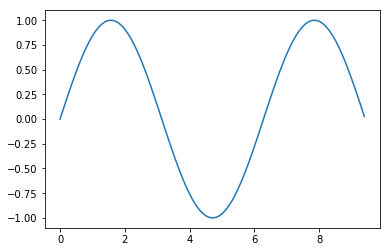

In [58]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

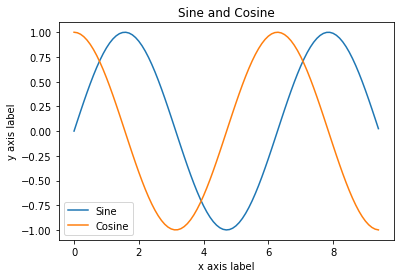

In [59]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

#### Exercise
Adapt the previuos example so that each function is in a different subplot

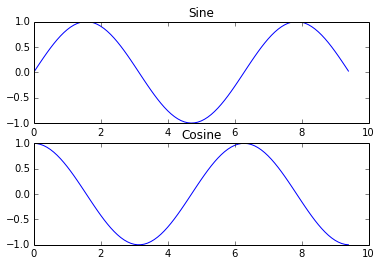

In [60]:
from IPython.display import Image
Image("exer_subplot.png")

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

## Pandas module

Pandas provides high-performance, easy-to-use data structures (data frames) and data analysis tools for the Python programming language. 

In [61]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

We can load the classical dataset Iris

In [62]:
iris = datasets.load_iris()
dfiris = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
dfiris['target'] = dfiris['target'].astype(int)
dfiris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


The `describe` command displays a summary of a data frame

In [63]:
dfiris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


There are several ways of indexing columns

In [64]:
dfiris.target

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [65]:
dfiris['sepal length (cm)']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [66]:
dfiris[['sepal length (cm)','petal length (cm)']].head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


#### Exercise
Use a list comprehension to get the columns that include *sepal* in their name. Tip: get the columns with `df.columns`

The following command selects a subset of the rows and columns

In [67]:
dfiris[4:9]['sepal length (cm)']

4    5.0
5    5.4
6    4.6
7    5.0
8    4.4
Name: sepal length (cm), dtype: float64

There are many mathematical functions that can be applied to a pandas data frame

In [68]:
dfiris.max()

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
target               2.0
dtype: float64

In [69]:
dfiris.max(axis=1)

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Length: 150, dtype: float64

In [70]:
dfiris['new_col'] = dfiris['sepal length (cm)'].min()
dfiris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,new_col
0,5.1,3.5,1.4,0.2,0,4.3
1,4.9,3.0,1.4,0.2,0,4.3
2,4.7,3.2,1.3,0.2,0,4.3
3,4.6,3.1,1.5,0.2,0,4.3
4,5.0,3.6,1.4,0.2,0,4.3


### Exercise
set `new_col` to be the sum of `petal length (cm)` and	`petal width (cm)`

#### Deteting and ploting columns

In [71]:
dfiris = dfiris.drop('new_col', axis=1)
dfiris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


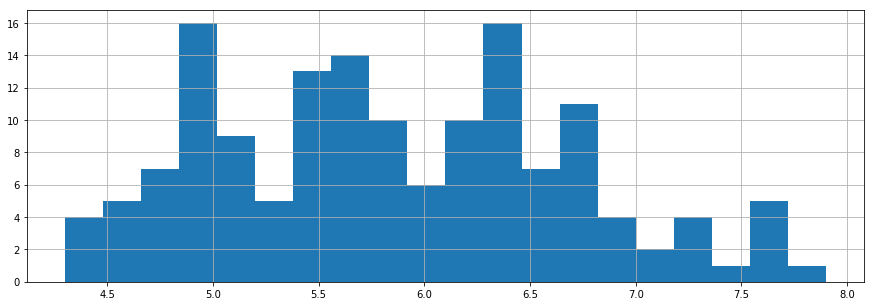

In [72]:
dfiris['sepal length (cm)'].hist(bins=20)

### Exercise
Set the size of the figure to 5x5 inches

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115e93898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115f41748>]], dtype=object)

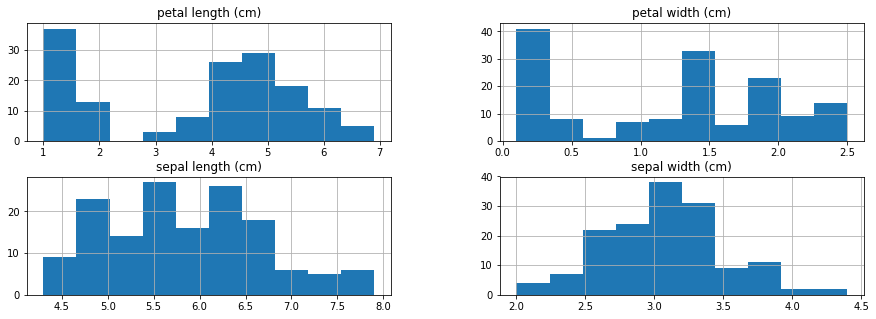

In [73]:
dfiris.drop('target', axis=1).hist()

### Exercise
Show the instances for which all the features are above the mean value